## ETL Project 
## Group 5

### Extract: Downloading, Import CSV files
### Transform: Cleaning the Data, analysis for the years 2013 only on both CSV files, Merge Data

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### ***Diversity Rate Dataset***

In [2]:
diversitycsv = "Resources/diversityindex.csv"
diversity_df = pd.read_csv(diversitycsv)
diversity_df.head()

,Location,Diversity-Index,"Black or African American alone, percent, 2013","American Indian and Alaska Native alone, percent, 2013","Asian alone, percent, 2013","Native Hawaiian and Other Pacific Islander alone, percent,","Two or More Races, percent, 2013","Hispanic or Latino, percent, 2013","White alone, not Hispanic or Latino, percent, 2013"
0,"Aleutians West Census Area, AK",0.769346,7.4,13.8,31.1,2.3,4.8,14.6,29.2
1,"Queens County, NY",0.742224,20.9,1.3,25.2,0.2,2.7,28.0,26.7
2,"Maui County, HI",0.740757,0.8,0.6,28.8,10.6,23.3,10.7,31.5
3,"Alameda County, CA",0.740399,12.4,1.2,28.2,1.0,5.2,22.7,33.2
4,"Aleutians East Borough, AK",0.738867,7.7,21.8,41.4,0.7,3.7,13.5,12.9


In [13]:
# Separating County and State 
cleaned_df = diversity_df
#cleaned_df['County'], cleaned_df['State'] = diversity_df['Location'].str.rsplit(', ').str
cleaned_df['County'] = diversity_df['Location'].str[:-4] 
cleaned_df['State'] = diversity_df['Location'].str[-2:]
cleaned_df.head() 

,Location,Diversity-Index,"Black or African American alone, percent, 2013","American Indian and Alaska Native alone, percent, 2013","Asian alone, percent, 2013","Native Hawaiian and Other Pacific Islander alone, percent,","Two or More Races, percent, 2013","Hispanic or Latino, percent, 2013","White alone, not Hispanic or Latino, percent, 2013",County,State
0,"Aleutians West Census Area, AK",0.769346,7.4,13.8,31.1,2.3,4.8,14.6,29.2,Aleutians West Census Area,AK
1,"Queens County, NY",0.742224,20.9,1.3,25.2,0.2,2.7,28.0,26.7,Queens County,NY
2,"Maui County, HI",0.740757,0.8,0.6,28.8,10.6,23.3,10.7,31.5,Maui County,HI
3,"Alameda County, CA",0.740399,12.4,1.2,28.2,1.0,5.2,22.7,33.2,Alameda County,CA
4,"Aleutians East Borough, AK",0.738867,7.7,21.8,41.4,0.7,3.7,13.5,12.9,Aleutians East Borough,AK


In [ ]:
#cleaned_df['State'] = pd.Series(index=cleaned_df.index)

In [14]:
#cleaned_df.describe()
cleaned_df.columns

Index(['Location', 'Diversity-Index',
       'Black or African American alone, percent, 2013',
       'American Indian and Alaska Native alone, percent, 2013',
       'Asian alone, percent, 2013',
       'Native Hawaiian and Other Pacific Islander alone, percent,',
       'Two or More Races, percent, 2013', 'Hispanic or Latino, percent, 2013',
       'White alone, not Hispanic or Latino, percent, 2013', 'County',
       'State'],
      dtype='object')

In [141]:
ca_df = cleaned_df.loc[cleaned_df['State'] == 'CA']
ca_df

,Location,Diversity-Index,"Black or African American alone, percent, 2013","American Indian and Alaska Native alone, percent, 2013","Asian alone, percent, 2013","Native Hawaiian and Other Pacific Islander alone, percent,","Two or More Races, percent, 2013","Hispanic or Latino, percent, 2013","White alone, not Hispanic or Latino, percent, 2013",County,State
3,"Alameda County, CA",0.740399,12.4,1.2,28.2,1,5.2,22.7,33.2,Alameda County,CA
9,"Solano County, CA",0.725821,14.9,1.3,15.4,1,6.7,25.2,40,Solano County,CA
14,"Santa Clara County, CA",0.694312,2.9,1.4,34.1,0.5,4,26.8,33.9,Santa Clara County,CA
16,"San Mateo County, CA",0.691029,3,0.9,26.9,1.6,4.4,25.4,41.1,San Mateo County,CA
20,"Sacramento County, CA",0.687281,10.8,1.6,15.4,1.2,5.9,22.3,47.3,Sacramento County,CA
21,"Contra Costa County, CA",0.686497,9.6,1,15.9,0.6,5,24.9,46.3,Contra Costa County,CA
23,"San Joaquin County, CA",0.685223,8.1,2,15.7,0.7,5.1,40.1,34.6,San Joaquin County,CA
28,"San Francisco County, CA",0.679829,6,0.8,34.4,0.5,4.1,15.3,41.6,San Francisco County,CA
39,"Orange County, CA",0.663094,2.1,1.1,19.2,0.4,3.2,34.2,42.6,Orange County,CA
41,"Los Angeles County, CA",0.661865,9.2,1.5,14.6,0.4,2.9,48.3,27.2,Los Angeles County,CA


In [143]:
ca_df.dtypes

Location                                                      object
Diversity-Index                                               object
Black or African American alone, percent, 2013                object
American Indian and Alaska Native alone, percent, 2013        object
Asian alone, percent, 2013                                    object
Native Hawaiian and Other Pacific Islander alone, percent,    object
Two or More Races, percent, 2013                              object
Hispanic or Latino, percent, 2013                             object
White alone, not Hispanic or Latino, percent, 2013            object
County                                                        object
State                                                         object
dtype: object

In [144]:
ca_df['State'].count()

59

In [ ]:
#plt.hist(fuel_economy.Combined_MPG)
#plt.xlabel("Fuel Economy (MPG)")
#plt.ylabel("Number of Vehicles")
#plt.show() 

In [169]:
#plt.hist(County)
#plt.xlabel('name')
#plt.ylabel('name2')
#plt.show() 

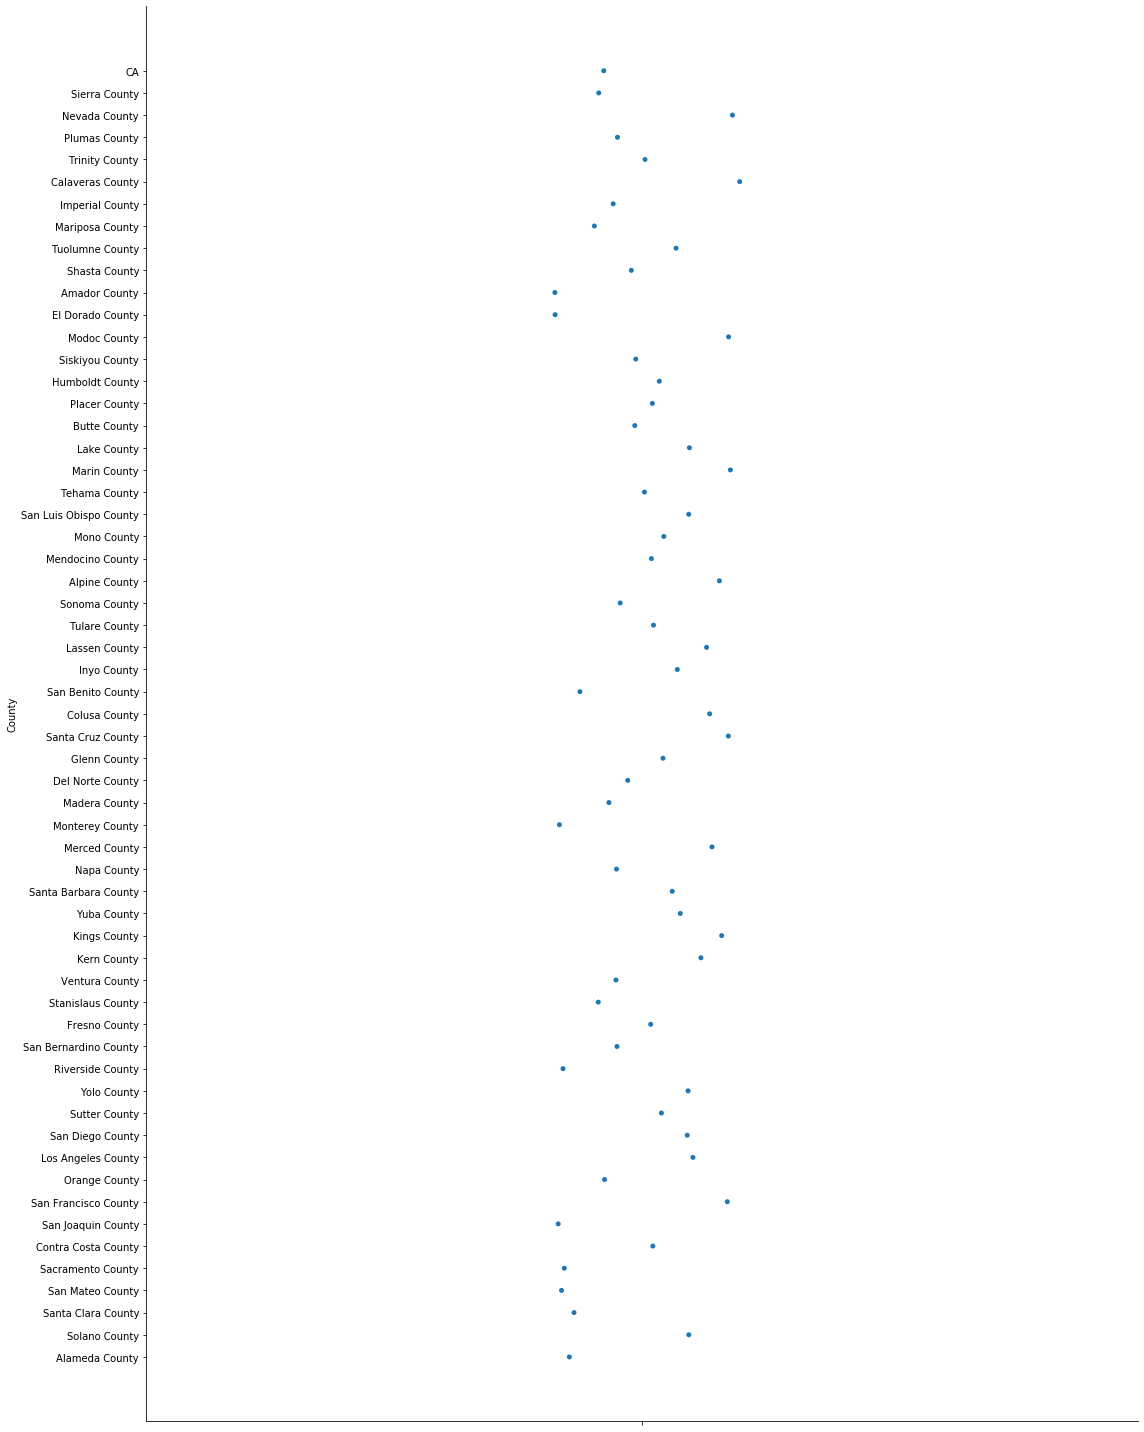

In [167]:
#sns.countplot(data=ca_df, x='County').set_title('Test');

#sns.catplot(y='County',
           #kind='strip',
           #height=20,
           #aspect=0.8,
           #order=ca_df.Location.value_counts().index,
           #data=ca_df) 

### ***Unemployment Rate Dataset***

In [48]:
unemployment_df = pd.read_csv('Resources/unemployment_output.csv')
unemployment_df.head()

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6


In [49]:
us_state_abbrev = {'California': 'CA'}

In [50]:
for key, value in us_state_abbrev.items():
    unemployment_df.loc[unemployment_df['State']==key,'State'] = value 

In [58]:
ca_unemployment_df = unemployment_df.loc[unemployment_df['State'] == 'CA'] 
ca_unemployment_df

,Year,Month,State,County,Rate
1282,2015,February,CA,Humboldt County,6.3
1283,2015,February,CA,Sonoma County,5.0
1284,2015,February,CA,San Luis Obispo County,5.0
1285,2015,February,CA,Glenn County,10.2
1286,2015,February,CA,Nevada County,6.0
...,...,...,...,...,...
884455,2009,November,CA,Butte County,12.7
884456,2009,November,CA,Kern County,14.7
884457,2009,November,CA,Napa County,9.3
884458,2009,November,CA,Mendocino County,10.5


In [59]:
ca_unemployment_df['State'].count()

16878

In [75]:
ca_unemployment_df.columns

Index(['Year', 'Month', 'State', 'County', 'Rate'], dtype='object')

In [97]:
#Note: float = can be decimal
ca_unemployment_df.dtypes

Year        int64
Month      object
State      object
County     object
Rate      float64
dtype: object

In [89]:
year_unemployment_df = ca_unemployment_df.loc[ca_unemployment_df['Year'] == 2013]
year_unemployment_df.head()

,Year,Month,State,County,Rate
172533,2013,February,CA,Humboldt County,9.1
172534,2013,February,CA,Sonoma County,8.0
172535,2013,February,CA,San Luis Obispo County,7.3
172536,2013,February,CA,Glenn County,14.0
172537,2013,February,CA,Nevada County,9.0


In [99]:
mean_unemployment_df = pd.DataFrame({"Unemployment Rate 2013":year_unemployment_df.groupby(['State','County'])['Rate'].mean()})
mean_unemployment_df 

Unemployment Rate
State County                                   
CA    Alameda County                   7.216667
      Alpine County                    9.533333
      Amador County                   10.316667
      Butte County                    10.233333
      Calaveras County                 9.900000
      Colusa County                   18.833333
      Contra Costa County              7.500000
      Del Norte County                11.666667
      El Dorado County                 8.483333
      Fresno County                   13.250000
      Glenn County                    11.766667
      Humboldt County                  8.066667
      Imperial County                 24.916667
      Inyo County                      7.900000
      Kern County                     11.683333
      Kings County                    13.366667
      Lake County                     10.916667
      Lassen County                   10.616667
      Los Angeles County               9.683333
      Madera County                   12.516667
      Marin County                     5.200000
      Mariposa County                 10.850000
      Mendocino County                 8.350000
      Merced County                   14.283333
      Modoc County                    12.250000
      Mono County                      8.733333
      Monterey County                 10.283333
      Napa County                      6.866667
      Nevada County                    8.100000
      Orange County                    6.616667
      Placer County                    7.716667
      Plumas County                   13.916667
      Riverside County                 9.900000
      Sacramento County                8.850000
      San Benito County               10.966667
      San Bernardino County            9.750000
      San Diego County                 7.833333
      San Francisco County             5.466667
      San Joaquin County              12.283333
      San Luis Obispo County           6.783333
      San Mateo County                 5.300000
      Santa Barbara County             7.233333
      Santa Clara County               6.466667
      Santa Cruz County               10.166667
      Shasta County                   11.750000
      Sierra County                   12.650000
      Siskiyou County                 13.100000
      Solano County                    9.066667
      Sonoma County                    7.066667
      Stanislaus County               12.883333
      Sutter County                   14.600000
      Tehama County                   11.500000
      Trinity County                  11.983333
      Tulare County                   14.350000
      Tuolumne County                 10.766667
      Ventura County                   7.883333
      Yolo County                      9.016667
      Yuba County                     13.100000

# Transform

# Load